In [86]:
import linsolve
import tf_linsolve
import scipy
import tensorflow as tf
import numpy as np
import pylab as plt
%load_ext line_profiler

from hera_cal import utils

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [87]:
x = np.linspace(0, 2 * np.pi, 10000)
g = np.cos(x) + 1j * np.sin(x)
h = np.sin(x) + 1j * np.cos(x)
i = x + 1j * x
j = -x - 1j * x
k = np.cos(x) - 1j * x
data = {
    "g + h": g + h,
    "g + i": g + i,
    "i + h": i + h,
    "i + g + h": i + g + h,
    "k + j": k + j,
    "i + j": i + j,
}
wgts = {k: np.random.uniform(0.9, 1.1, v.shape[0]) for k, v in data.items()}

In [88]:
ls = linsolve.LinearSolver(data)
tfls = tf_linsolve.LinearSolver(data)

In [89]:
%time solution = ls.solve()

CPU times: user 7.92 ms, sys: 5.82 ms, total: 13.7 ms
Wall time: 6.93 ms


In [90]:
%time sol = tfls.solve()

CPU times: user 6.73 ms, sys: 8.72 ms, total: 15.5 ms
Wall time: 9.95 ms


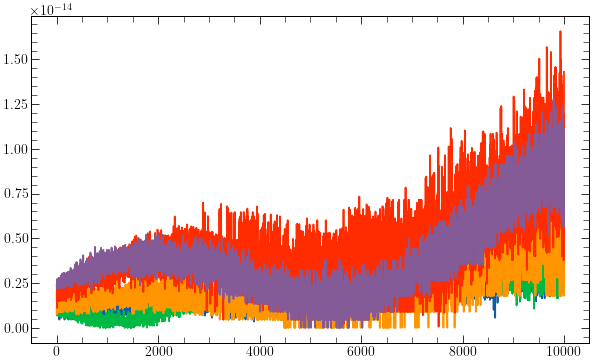

In [91]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Least-Squares Case

In [92]:
ls = linsolve.LinearSolver(data, wgts=wgts)
tfls = tf_linsolve.LinearSolver(data, wgts=wgts)

In [94]:
%time linsolve.LinearSolver(data, wgts=wgts)

CPU times: user 277 µs, sys: 3 µs, total: 280 µs
Wall time: 285 µs


In [96]:
%lprun -f tfls.solve tfls.solve(mode='lsqr')

In [97]:
%time solution = ls.solve(mode='lsqr')

CPU times: user 312 ms, sys: 4.49 ms, total: 317 ms
Wall time: 317 ms


In [98]:
%time sol = tfls.solve(mode='lsqr', rcond=0)

CPU times: user 54.2 ms, sys: 15.5 ms, total: 69.7 ms
Wall time: 13.5 ms


In [99]:
%time sol = tfls.solve(mode='lsqr_stable', rcond=0)

CPU times: user 98.1 ms, sys: 16.3 ms, total: 114 ms
Wall time: 18.3 ms


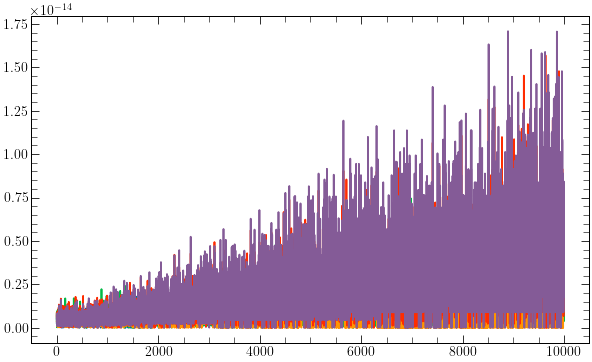

In [32]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Psuedo-inverse

In [33]:
%time solution = ls.solve()

CPU times: user 111 ms, sys: 13 ms, total: 124 ms
Wall time: 123 ms


In [34]:
%time sol = tfls.solve()

CPU times: user 260 ms, sys: 72.2 ms, total: 333 ms
Wall time: 49 ms


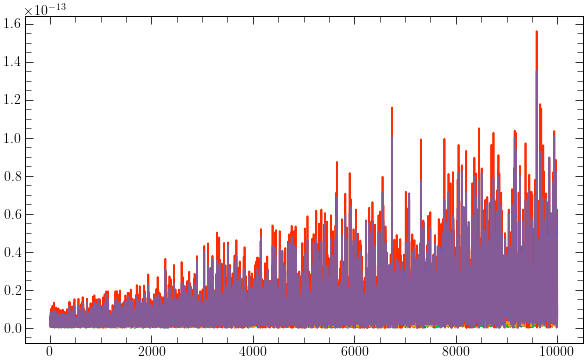

In [35]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Solve

In [36]:
%time solution = ls.solve(mode='solve')

CPU times: user 78.3 ms, sys: 9.15 ms, total: 87.5 ms
Wall time: 86.5 ms


In [37]:
%time sol = tfls.solve(mode='solve')

CPU times: user 87.2 ms, sys: 30.6 ms, total: 118 ms
Wall time: 21.8 ms


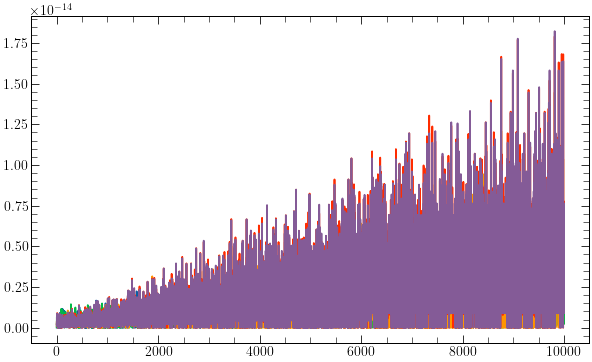

In [38]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

## Test LogProductSolver and LinProductSolver

In [39]:
x = np.linspace(0, 2 * np.pi, 10000)
g = np.cos(x) + 1j * np.sin(x)
h = np.sin(x) + 1j * np.cos(x)
i = x + 1j * x
j = -x - 1j * x
k = np.cos(x) - 1j * x
data = {
    "g * h": g * h,
    "g * i": g * i,
    "i * h": i * h,
    "i * g * h": i * g * h,
    "k * j": k * j,
    "i * j": i * j,
}
wgts = {k: np.random.uniform(0.9, 1.1, v.shape[0]) for k, v in data.items()}

In [40]:
ls = linsolve.LogProductSolver(data, wgts=wgts)
tfls = tf_linsolve.LogProductSolver(data, wgts=wgts)

/usr/local/anaconda3/lib/python3.8/site-packages/linsolve/linsolve.py:722: RuntimeWarning: divide by zero encountered in log
  dk = np.log(data[k])
/Users/tyler/Work/tf_linsolve/linsolve/tf_linsolve/tf_linsolve.py:757: RuntimeWarning: divide by zero encountered in log
  dk = np.log(data[k])


In [41]:
%timeit solution = ls.solve()

152 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
%timeit sol = tfls.solve()

The slowest run took 4.93 times longer than the fastest. This could mean that an intermediate result is being cached.
101 ms ± 57.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
ls = linsolve.LinProductSolver(data, sol, wgts=wgts)
tfls = tf_linsolve.LinProductSolver(data, sol, wgts=wgts)

In [44]:
%time meta, sol = ls.solve_iteratively(mode='lsqr')

CPU times: user 1.32 s, sys: 817 ms, total: 2.13 s
Wall time: 4.41 s


In [45]:
%time meta, sol = ls.solve_iteratively()

CPU times: user 171 ms, sys: 145 ms, total: 316 ms
Wall time: 606 ms


In [46]:
%time met, sol = tfls.solve_iteratively(mode='lsqr_stable')

CPU times: user 169 ms, sys: 48.6 ms, total: 217 ms
Wall time: 135 ms


In [47]:
%time met, sol = tfls.solve_iteratively()

CPU times: user 240 ms, sys: 125 ms, total: 365 ms
Wall time: 178 ms


## Realistic Example

In [84]:
d

In [49]:
antpos = hex_array(5, split_core=False, outriggers=False)
reds = get_reds(antpos)
freqs = np.linspace(100e6, 200e6, 200)
gains, trus_vis, data = sim_red_data(reds, shape=(1, 200))
data = {k: v.astype(np.complex64) for k, v in data.items()}

/usr/local/anaconda3/lib/python3.8/site-packages/hera_sim/noise.py:204: UserWarning: white_noise is being deprecated. Use utils.gen_white_noise instead.
  warnings.warn("white_noise is being deprecated. Use utils.gen_white_noise instead.")


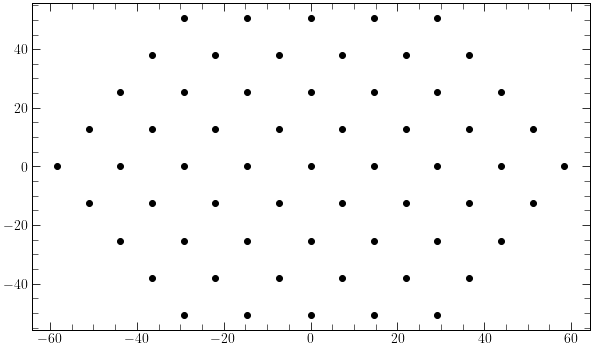

In [50]:
plt.figure(figsize=(10, 6))
for k, v in antpos.items():
    plt.scatter(v[0], v[1], color='k')
    
plt.show()

In [51]:
%lprun -f tf_info._firstcal_iteration tf_info._firstcal_iteration(data, np.diff(freqs)[0], freqs[0])

UsageError: Could not find function 'tf_info._firstcal_iteration'.
NameError: name 'tf_info' is not defined


In [52]:
tf_info = RC(reds)
info = RedundantCalibrator(reds)
wgts = {k: np.ones((1, 200)) for k in data.keys()}

In [55]:
%time tfmeta, tfsol0 = tf_info.firstcal(data, freqs, mode='lsqr_stable')

CPU times: user 23.2 s, sys: 289 ms, total: 23.5 s
Wall time: 23.3 s


In [54]:
%lprun -f tf_info._firstcal_iteration tf_info._firstcal_iteration(data, np.diff(freqs)[0], freqs[0], mode='lsqr_stable')

The worst offender of firstcal is the delay fitting

In [57]:
%time meta, sol0 = info.firstcal(data, freqs)

CPU times: user 24.7 s, sys: 423 ms, total: 25.1 s
Wall time: 23.6 s


In [63]:
%time tfmeta, tflog_sol = tf_info.logcal(data, sol0=tfsol0, mode='default')

CPU times: user 498 ms, sys: 23.4 ms, total: 521 ms
Wall time: 487 ms


In [64]:
%time meta, log_sol = info.logcal(data, sol0=sol0)

CPU times: user 823 ms, sys: 72.7 ms, total: 896 ms
Wall time: 501 ms


In [65]:
%lprun -f tf_info.logcal tf_info.logcal(data, sol0=sol0, mode='default')

In [66]:
%lprun -f info.logcal info.logcal(data, sol0=sol0, mode='default')

In [67]:
make_sol_finite(log_sol)
make_sol_finite(tflog_sol)

In [75]:
%time meta, sol = tf_info.omnical(data, log_sol, wgts=wgts, maxiter=500)

CPU times: user 1.32 s, sys: 28.1 ms, total: 1.35 s
Wall time: 1.34 s


In [76]:
%time meta, sol = info.omnical(data, log_sol, wgts=wgts, maxiter=500)

CPU times: user 1.35 s, sys: 28.8 ms, total: 1.38 s
Wall time: 1.38 s


## Quick Summary

- The worst offender of `firstcal` is the delay fitting taking ~60% of the 25 seconds for this run
- The worst offender of `logcal` is linsolve taking ~95% of this run
- Omnical is actually pretty fast and not exactly localized to any particular area

In [83]:
%lprun -f utils.interp_peak utils.interp_peak(np.fft.fft(wgts[(0, 6, 'nn')]))

In [ ]:
utils.interp_peak?

In [244]:
utils.fft_dly??

In [226]:
utils.interp_peak??

In [228]:
tf_info._firstcal_iteration??

In [230]:
tf.signal.fft?

In [ ]:
wgts